In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.constants import G, sigma_sb, k_B, m_p


In [2]:
def temp(L, d):
    t4 = L/(16*np.pi*sigma_sb*(d**2))
    return np.power(t4, 1/4)

In [3]:
def sound_speed(gamma, T, mu):
    gamma=1
    speed = np.sqrt(gamma*k_B*T/(mu*m_p))
    return speed
    

In [4]:
sound_speed(-.1, 2000, 14)

<Quantity 1085.90974084 J(1/2) / (K(1/2) kg(1/2))>

In [5]:
def omega(ms,d):
    m = (ms * u.M_sun).to(u.kg)
    '''Keplerian frequency in [Hz]
    ms = mass of the central object [msun]
    r = radius [au]'''
   
    return np.sqrt(G*ms/d**3)

In [6]:
#mass in kg r in m for right now

def kep_freq(mass, rad):
    m = (mass * u.M_sun).to(u.kg)
    r = (rad * u.AU).to(u.m)
    #G = 6.67e-11 # in m^3/kg s^2
    v = np.sqrt(G*m/r)
    orb = np.pi*2*r
    freq = v/orb
    return freq

In [7]:
radius = np.linspace(1,70, 20)
kep_test = kep_freq(1, radius)
kep_test

<Quantity [3.16874893e-08, 3.17902705e-09, 1.33403970e-09, 7.72423669e-10,
           5.17946864e-10, 3.77890659e-10, 2.91263717e-10, 2.33325742e-10,
           1.92337546e-10, 1.62087032e-10, 1.39010908e-10, 1.20934117e-10,
           1.06461631e-10, 9.46618574e-11, 8.48914372e-11, 7.66932807e-11,
           6.97346455e-11, 6.37681546e-11, 5.86064752e-11, 5.41054197e-11] 1 / s>

In [38]:
#surface density
def sigma(m_d, gamma, rc, d):
    #m_disk = (m_d * u.M_sun).to(u.kg)
    m_disk = m_d
    #print(m_disk)
    term1 = m_disk*(2-gamma)/(2*np.pi*(rc**2))
    #print(term1)
    term2 = (d/rc)**-gamma
    #print(term2)
    exp = np.exp(-(d/rc)**(2-gamma))
    #print(exp)
    return term1*term2*exp

In [39]:
np.log10(-6)

/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


nan

In [40]:
10**-6.5

3.162277660168379e-07

In [41]:
sigma_test = sigma(10**-6.5, -.5, 140, radius)

In [42]:
sigma_test

array([5.42548014e-13, 1.16739582e-12, 1.55828007e-12, 1.86725517e-12,
       2.12909689e-12, 2.35833532e-12, 2.56250184e-12, 2.74596862e-12,
       2.91145021e-12, 3.06070401e-12, 3.19489876e-12, 3.31482625e-12,
       3.42103179e-12, 3.51389910e-12, 3.59370825e-12, 3.66067673e-12,
       3.71498935e-12, 3.75682070e-12, 3.78635213e-12, 3.80378471e-12])

In [43]:
def gi(L, m_star, m_disk, mu, rc, gamma, radius):
    surf = sigma(m_disk, gamma, rc, radius)*(u.M_sun/(u.AU**2)).to(u.kg/u.meter**2)
    #print("sigma "+ str(surf))
    radius = radius*u.AU.to(u.meter)
    lum = (L*u.L_sun).to(u.Watt)
    #print("lum "+ str(lum))
    T = temp(lum, radius) * u.Kelvin
    #print("T "+ str(T))
    cs = sound_speed(1, T, mu) * u.meter/u.second
    #print("cs "+ str(cs))
    m_star = m_star*u.Msun.to(u.kg)
    freq = omega(m_star, radius)/u.second
    #print("freq "+ str(freq))
    #surf = sigma(m_disk, gamma, rc, radius)*u.kg/(u.meter**2)
    #print("sigma "+ str(surf))
    return cs*freq/(np.pi*surf*G)

In [44]:
'''found 18.4 L_sun in literature(Wahhaj 2007) using stellar mass from Meredith's paper (2.1), '''

"found 18.4 L_sun in literature(Wahhaj 2007) using stellar mass from Meredith's paper (2.1), "

In [45]:
rad = np.linspace(5, 300, 50)

In [48]:
test = gi(18.4, 2.1, 10**-6, 2, 140, -0.5, rad)

Text(0.5, 1.0, 'Gravitational Instability in 49 Ceti')

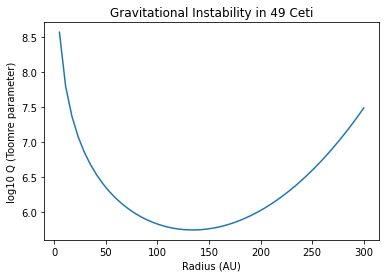

In [49]:
fig, ax = plt.subplots()
plt.plot(rad, np.log10(test.value))
ax.set_xlabel("Radius (AU)")
ax.set_ylabel("log10 Q (Toomre parameter)")
ax.set_title("Gravitational Instability in 49 Ceti")

AttributeError: 'Quantity' object has no 'cartesian' member

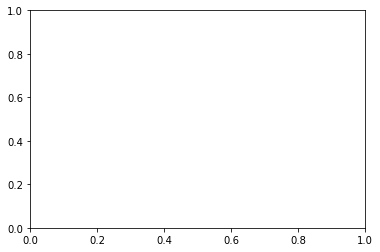

In [ ]:
fig, ax = plt.subplots()
plt.plot(rad, np.log10(test.cartesian))
ax.set_xlabel("Radius (AU)")
ax.set_ylabel("Q (Toomre parameter)")
ax.set_title("Gravitational Instability in 49 Ceti")

In [ ]:
test.shape

(50,)

In [ ]:
rad.shape

(50,)

In [ ]:
test

<Quantity [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
           nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
           nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
           nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan] J(1/2) s / (kg m(5/4))>